In [75]:
%reset

In [76]:
import numpy as np
from skimage.morphology import disk, dilation
from augment_annotation import augment_annotation
from load_annotation_data import load_annotation_data
import matplotlib.pyplot as plt
import os

In [77]:
# Pre - inputs
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model'
pthDL = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\04_19_2024'
pthim_ann = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\5x'
classcheck = 0
_, numann = load_annotation_data(pthDL, pth, pthim_ann,classcheck)

pthlabel = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\label'
pthim = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\im'
imnm = '00226.tif' #image names/idx differ from the ones in matlab, as the tiles are created in a random order
size_tile = 10200
imT = np.zeros((size_tile, size_tile), dtype=np.uint8)
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model'

 
Importing annotation data...
Image 1 of 2: SG_013_0061
 annotation data previously loaded
Image 2 of 2: SG_014_0016
 annotation data previously loaded


In [78]:
import pandas as pd
numann_array = np.array(numann)
df_numann = pd.DataFrame(numann_array)
df_numann

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,15178.0,0.0,0.0,0.0,5368.0,0.0,0.0,0.0,0.0
1,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,64118.0,0.0,0.0,0.0,0.0
3,0.0,486.0,0.0,0.0,0.0,3314.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,6114.0,0.0,1265.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,881.0,0.0,0.0,3155.0,702.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,3016.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,58222.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,40035.0,0.0,0.0,0.0,0.0


In [79]:
# ________inputs of the function
im = np.array(plt.imread(os.path.join(pthim, imnm)), dtype=np.float64)
print(f'im: {os.path.join(pthim, imnm)}')
TA = np.array(plt.imread(os.path.join(pthlabel, imnm)), dtype=np.float64)
print(f'TA: {os.path.join(pthlabel, imnm)}')
do_augmentation = True
class_id = 1
big_tile_size = imT.shape[0] 
print(f'big tile size: {big_tile_size}')
Shape_numann = 11
print(f'Shape Numann: {Shape_numann}')
num_pixels_class = np.zeros(Shape_numann, dtype=np.int32)
print(f'num_pixels_class: {num_pixels_class}')
kpall = 1

im: \\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\im\00226.tif
TA: \\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\label\00226.tif
big tile size: 10200
Shape Numann: 11
num_pixels_class: [0 0 0 0 0 0 0 0 0 0 0]


Type TA:<class 'numpy.ndarray'>
Shape TA: (147, 102)
labels: [1 5 6 7]


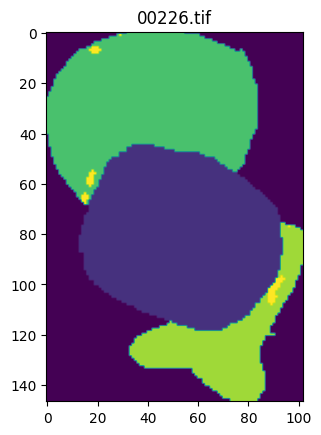

In [80]:
print(f'Type TA:{type(TA)}')
print(f'Shape TA: {TA.shape}')
labels = np.unique(TA)
labels = labels[1:].astype(int)
print(f'labels: {labels}')
plt.imshow(TA)
plt.title(imnm)
plt.show()


In [81]:
if do_augmentation:
    im, TA = augment_annotation(im, TA, 1, 1, 1, 1, 0)
else:
    im, TA = augment_annotation(im, TA, 1, 1, 0, 0, 0)

if kpall == 0:
    maxn = num_pixels_class[type]
    kp = num_pixels_class <= maxn * 1.05
else:
    kp = num_pixels_class >= 0


Type TA:<class 'numpy.ndarray'>
Shape TA: (138, 96)
labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 7]


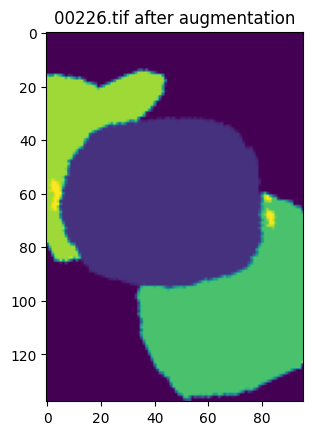

In [82]:
print(f'Type TA:{type(TA)}')
print(f'Shape TA: {TA.shape}')
labels = np.unique(TA)
labels = labels[1:].astype(int)
print(f'labels: {labels}')
plt.imshow(TA)
plt.title(imnm + ' after augmentation')
plt.show()

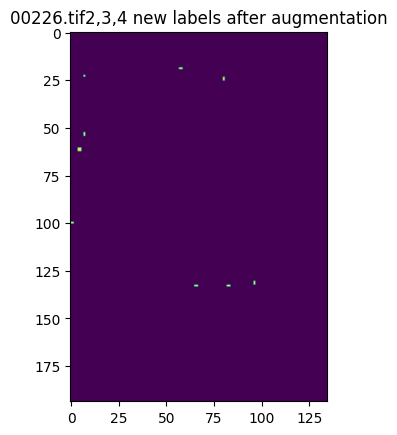

In [74]:
plt.imshow(np.isin(TA, [2,3,4]))
plt.title(imnm + '2,3,4 new labels after augmentation')
plt.show()

unique labels: [1 2 3 4 5 6 7]


In [16]:
kp = np.concatenate(([0], kp))

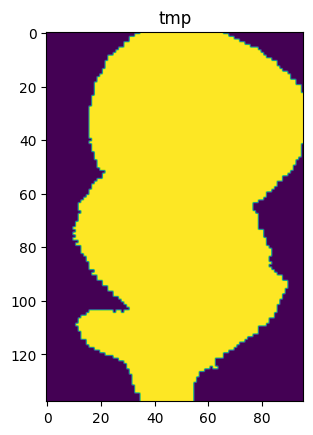

In [32]:
tmp = kp[TA.astype(int)] 
plt.imshow(tmp)
plt.title('tmp')
plt.show()

In [33]:
dil = np.random.randint(15) + 15
print(f'dil: {dil}')

dil: 15


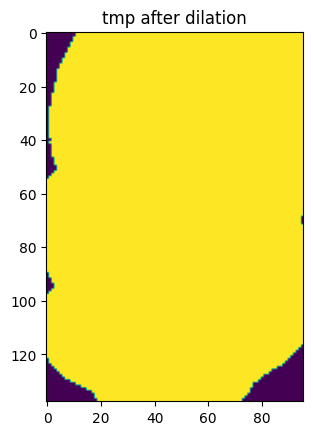

In [34]:
tmp = dilation(tmp, disk(dil))
plt.imshow(tmp)
plt.title('tmp after dilation')
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U26')) -> None

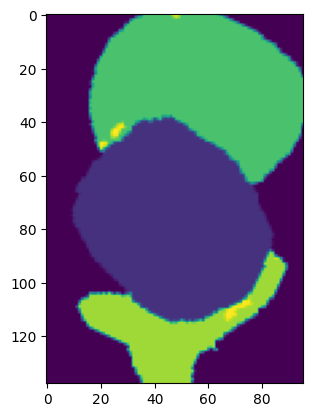

In [36]:
TA = TA * tmp
for i in range(im.shape[2]):
    im[:,:,i] *= tmp
plt.imshow(TA)
plt.title('TA after weird thing with kp')
plt.show()

In [37]:
p1 = min([big_tile_size, TA.shape[0]])
p2 = min([big_tile_size, TA.shape[1]])

In [38]:
im = im[0:p1, 0:p2, :]
TA = TA[0:p1, 0:p2]

In [39]:
kpout = np.unique(TA)


In [ ]:

#return variables
im = im.astype(np.uint8)
TA = TA.astype(np.uint8)

kpout = np.unique(TA)
kpout = kpout[1:]